### Homework 7 — *College Student Success Analytics*
**Topics:** Pandas, NumPy, Matplotlib  

**Goal:**  For this homework, I want you to practices with pandas, numpy, and matplotlib but I want you also to practice figuring out what the data is telling us!  So, story-telling is a learning goal:)  

Two synthetic datasets describe **250 fictional Rhodes students**. 

| File | Rows | Description |
|------|------|-------------|
| `student_academic.csv` | 250 | One row per student: GPA, credits, study hours, attendance, etc. |
| `student_activities.csv` | 0–650 | One row per *activity* a student joins (0–3 per student) with hours/week & leadership flag |

---
## Task
The Dean of Students wants to know which factors predict academic success and whether co‑curricular involvement helps or hurts. Produce a short analytics report (and this reproducible notebook) that answers her questions.

---
## Part A — Data Wrangling *(15 pts)*
1. **Load & inspect** both CSVs (done above). Show shape and `dtypes`.
2. **Handle missing values** (~5 % already inserted). Choose a strategy to fix it **and justify it in the comments**.
3. **Add Three Columns** (GPA_change, StudyIntensity, AttendanceFlag) to the data frame calculated as follows:
```text
GPA_change          = GPA_Sem2 – GPA_Sem1
StudyIntensity = Hours_Study / Credits_Enrolled
AttendanceFlag = 1 if AttendanceRate ≥ 0.90 else 0
```


In [94]:
#PART A: Data Wrangling

import pandas as pd

academic_df = pd.read_csv('student_academic.csv')
activities_df = pd.read_csv('student_activities.csv')

print("Academic DataFrame shape:", academic_df.shape)
print("Academic DataFrame dtypes: ", academic_df.dtypes)

print("\nActivities DataFrame shape:", activities_df.shape)
print("Activities DataFrame dtypes: ", activities_df.dtypes)


#The isnull and sum combs through the column to return the missing values in each column. 
print("Academic DataFrame missing values: ", academic_df.isnull().sum())

print("Academic DataFrame missing values: ", activities_df.isnull().sum())

academic_df["GPA_change"] = academic_df["GPA_Sem2"] - academic_df["GPA_Sem1"]

academic_df["StudyIntensity"] = academic_df["Hours_Study"] / academic_df["Credits_Enrolled"]

academic_df["AttendanceFlag"] =academic_df["AttendanceRate"] >= 0.90 

academic_df.head

Academic DataFrame shape: (250, 9)
Academic DataFrame dtypes:  StudentID             int64
Major                object
ClassYear            object
GPA_Sem1            float64
GPA_Sem2            float64
Credits_Enrolled      int64
Hours_Study         float64
AttendanceRate      float64
Scholarship          object
dtype: object

Activities DataFrame shape: (364, 4)
Activities DataFrame dtypes:  StudentID          int64
Activity          object
HoursPerWeek       int64
LeadershipRole    object
dtype: object
Academic DataFrame missing values:  StudentID            0
Major                0
ClassYear            0
GPA_Sem1            11
GPA_Sem2            12
Credits_Enrolled     0
Hours_Study         13
AttendanceRate      15
Scholarship          0
dtype: int64
Academic DataFrame missing values:  StudentID         0
Activity          0
HoursPerWeek      0
LeadershipRole    0
dtype: int64


<bound method NDFrame.head of      StudentID             Major  ClassYear  GPA_Sem1  GPA_Sem2  \
0         1001        Psychology   Freshman      3.86      3.68   
1         1002           English     Senior      3.01      3.29   
2         1003         Economics     Senior      3.23      3.23   
3         1004           English  Sophomore      2.96      2.85   
4         1005           English     Senior      2.93      2.92   
..         ...               ...        ...       ...       ...   
245       1246         Economics     Senior      3.56      2.93   
246       1247        Psychology   Freshman      2.85       NaN   
247       1248  Computer Science     Junior      3.11      3.19   
248       1249        Psychology     Senior      2.89      2.84   
249       1250         Economics     Junior      3.43      2.84   

     Credits_Enrolled  Hours_Study  AttendanceRate Scholarship  GPA_change  \
0                  14         12.0            0.98          No       -0.18   
1        

---
## Part B — Exploratory Analyses *(55 pts)*
The difficulty of this problem that the data is contained in two different data sets.  They are connected by StudentID.  You'll need to google this and figure out how to *merge* the data.   Make sure you do it correctly.

| # | Question | Pts |
|---|----------|-----|
| 1 | **GPA shift.** Distribution of `GPA_change`. Print out the top 10 improvers. | 8 |
| 2 | **Study habits.** Pearson correlation between `StudyIntensity` and `GPA_Sem2`; Visualize with scatter and print out the Pearson correlation (in our notes).    | 8 |
| 3 | **Scholarships.** Mean & SD of `GPA_Sem2` for scholarship vs non‑scholarship.  Visualize this with box plot. | 6 |
| 4 | **Attendance.** Compute the average `GPA_Sem2` for `AttendanceFlag` = 1 vs 0. Visualize this with a bar chart. | 6 |
| 5 | **Activity load.** Compute total `Activity_Hours`; plot vs `GPA_Sem2`. | 6 |
| 6 | **Leadership.** Does *any* leadership role correspond to higher GPA?  Plot this with box plot (include average and std for each leadership role).  You might have to groupby...| 7 |
| 7 | **Major comparison.** For every major: mean GPA, mean study hours, scholarship %. Print out  and Visualize with a grouped bar chart. | 8 |
| 8 | **Predictive index.** Calculate the (z‑score) GPA (looking back at our class notes), attendance, study hours; Call this variable `SuccessScore`; list top 15. | 6 |

In [97]:
# You can break this cell up if you prefer.

merged_df = pd.merge(academic_df, activities_df, on= "StudentID", how="inner")
print(merged_df)



     StudentID             Major  ClassYear  GPA_Sem1  GPA_Sem2  \
0         1003         Economics     Senior      3.23      3.23   
1         1003         Economics     Senior      3.23      3.23   
2         1004           English  Sophomore      2.96      2.85   
3         1007         Economics  Sophomore      3.09      2.33   
4         1007         Economics  Sophomore      3.09      2.33   
..         ...               ...        ...       ...       ...   
359       1242  Computer Science     Senior      3.25      3.72   
360       1245         Economics   Freshman      3.06       NaN   
361       1247        Psychology   Freshman      2.85       NaN   
362       1248  Computer Science     Junior      3.11      3.19   
363       1250         Economics     Junior      3.43      2.84   

     Credits_Enrolled  Hours_Study  AttendanceRate Scholarship  GPA_change  \
0                  15         33.0            0.89          No        0.00   
1                  15         33.0     

In [99]:
#1. GPA shift. Distribution of GPA_change. Print out the top 10 improvers.

top_10_change = academic_df.sort_values('GPA_change', ascending=False)
print(top_10_change[['StudentID','GPA_change']].head(10))

     StudentID  GPA_change
71        1072        1.45
202       1203        1.42
92        1093        1.38
204       1205        1.37
222       1223        1.24
193       1194        1.16
178       1179        1.13
34        1035        1.12
62        1063        1.05
137       1138        1.04


[[nan nan]
 [nan nan]]
Pearson correlation between Study Intensity and GPA_Sem2: nan


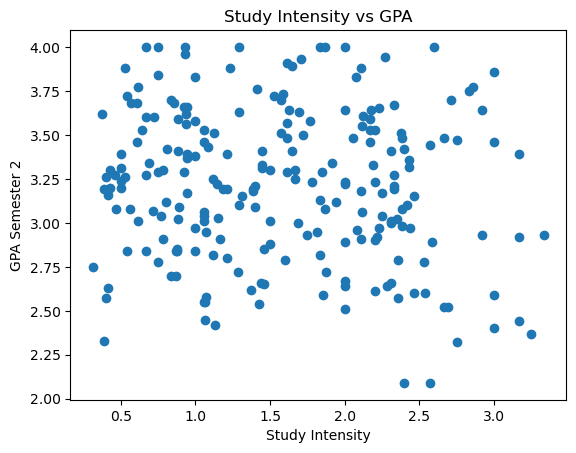

In [101]:
#2. Study habits. Pearson correlation between StudyIntensity and GPA_Sem2; 
#Visualize with scatter and print out the Pearson correlation (in our notes).

import matplotlib.pyplot as plt
import numpy as np

study_intensity = academic_df['StudyIntensity'].to_numpy()
gpa_sem2 = academic_df['GPA_Sem2'].to_numpy()

corr = np.corrcoef(study_intensity, gpa_sem2)
print(corr)

corr = corr[0,1]

print(f"Pearson correlation between Study Intensity and GPA_Sem2: {corr:.3f}")

plt.scatter(academic_df['StudyIntensity'], academic_df['GPA_Sem2'])
plt.xlabel('Study Intensity')
plt.ylabel('GPA Semester 2')
plt.title('Study Intensity vs GPA')
plt.show()


The mean of scholarship GPA in semester 2: 3.27
The standard deviation of scholarship GPA in semester 2: 0.41
The mean of non-scholarship GPA in semester 2: 3.18
The standard deviation of non-scholarship GPA in semester 2: 0.43


/var/folders/zv/cwp_7pnn24v2tm43lvl4n9b40000gn/T/ipykernel_13502/4053461474.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=academic_df, x='Scholarship', y='GPA_Sem2', palette={'Yes': 'lightblue', 'No': 'lightgray'})


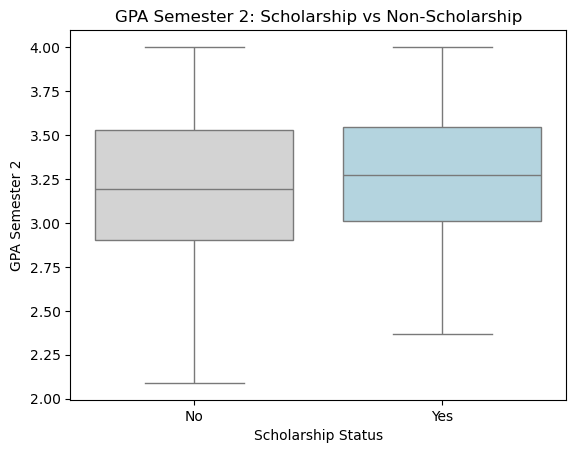

In [103]:
#3. Scholarships. Mean & SD of GPA_Sem2 for scholarship vs non‑scholarship. 
#Visualize this with box plot.#

import seaborn as sns
import matplotlib.pyplot as plt

mean_scholarship = academic_df[academic_df['Scholarship'] == 'Yes']['GPA_Sem2'].mean()
std_scholarship = academic_df[academic_df['Scholarship'] == 'Yes']['GPA_Sem2'].std()

mean_no_scholarship = academic_df[academic_df['Scholarship'] == 'No']['GPA_Sem2'].mean()
std_no_scholarship = academic_df[academic_df['Scholarship'] == 'No']['GPA_Sem2'].std()

print(f"The mean of scholarship GPA in semester 2: {mean_scholarship:.2f}")
print(f"The standard deviation of scholarship GPA in semester 2: {std_scholarship:.2f}")
print(f"The mean of non-scholarship GPA in semester 2: {mean_no_scholarship:.2f}")
print(f"The standard deviation of non-scholarship GPA in semester 2: {std_no_scholarship:.2f}")

sns.boxplot(data=academic_df, x='Scholarship', y='GPA_Sem2', palette={'Yes': 'lightblue', 'No': 'lightgray'})

plt.title('GPA Semester 2: Scholarship vs Non-Scholarship')
plt.ylabel('GPA Semester 2')
plt.xlabel('Scholarship Status')
plt.show()




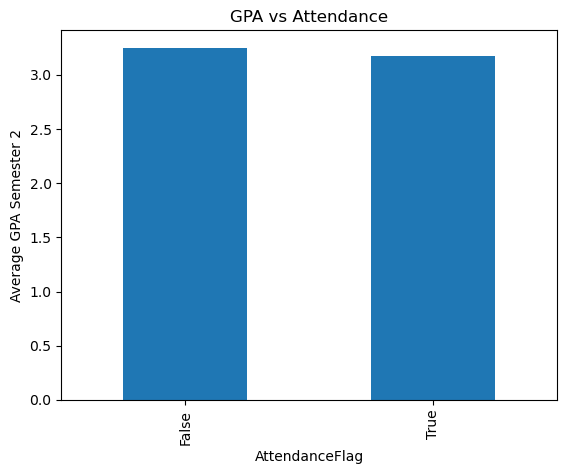

AttendanceFlag
False    3.249552
True     3.177885
Name: GPA_Sem2, dtype: float64


In [105]:
#4. Attendance. Compute the average GPA_Sem2 for AttendanceFlag = 1 vs 0. 
#Visualize this with a bar chart.

attendance_means = academic_df.groupby('AttendanceFlag')['GPA_Sem2'].mean()

attendance_means.plot(kind='bar')
plt.ylabel('Average GPA Semester 2')
plt.title('GPA vs Attendance')
plt.show()

print(attendance_means)


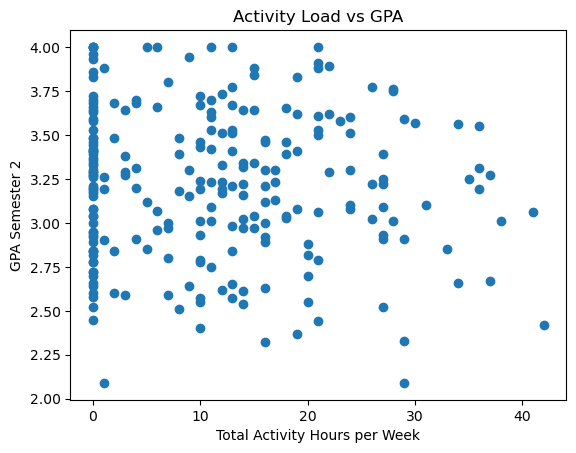

In [154]:
#5. Activity load. Compute total Activity_Hours; plot vs GPA_Sem2.

activity_hours = activities_df.groupby('StudentID')['HoursPerWeek'].sum()

#make new column and rename it
activity_hours.columns = ['StudentID', 'TotalActivityHours']

academic_df = pd.merge(academic_df, activity_hours, on='StudentID', how='left')

academic_df['TotalActivityHours'] = academic_df['TotalActivityHours'].fillna(0)

plt.scatter(academic_df['TotalActivityHours'], academic_df['GPA_Sem2'])
plt.xlabel('Total Activity Hours per Week')
plt.ylabel('GPA Semester 2')
plt.title('Activity Load vs GPA')
plt.show()




Mean GPA by Leadership Role:/n
LeadershipRole
No     3.204150
Yes    3.214639
Name: GPA_Sem2, dtype: float64
Standard Deviation of GPA by Leadership Role:
LeadershipRole
No     0.428773
Yes    0.416153
Name: GPA_Sem2, dtype: float64


/var/folders/zv/cwp_7pnn24v2tm43lvl4n9b40000gn/T/ipykernel_13502/2219989178.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='LeadershipRole', y='GPA_Sem2', palette={'Yes': 'lightblue', 'No': 'lightgray'})


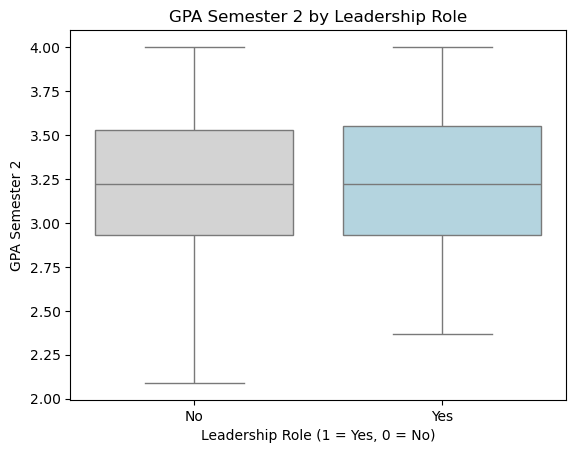

In [152]:
#6. Leadership. Does any leadership role correspond to higher GPA? 
#Plot this with box plot (include average and std for each leadership role). 
#You might have to groupby...


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


mean_by_role = merged_df.groupby('LeadershipRole')['GPA_Sem2'].mean()
std_by_role = merged_df.groupby('LeadershipRole')['GPA_Sem2'].std()

print("Mean GPA by Leadership Role:")
print(mean_by_role)

print("Standard Deviation of GPA by Leadership Role:")
print(std_by_role)

sns.boxplot(data=merged_df, x='LeadershipRole', y='GPA_Sem2', palette={'Yes': 'lightblue', 'No': 'lightgray'})

plt.title('GPA Semester 2 by Leadership Role')
plt.xlabel('Leadership Role (1 = Yes, 0 = No)')
plt.ylabel('GPA Semester 2')
plt.show()








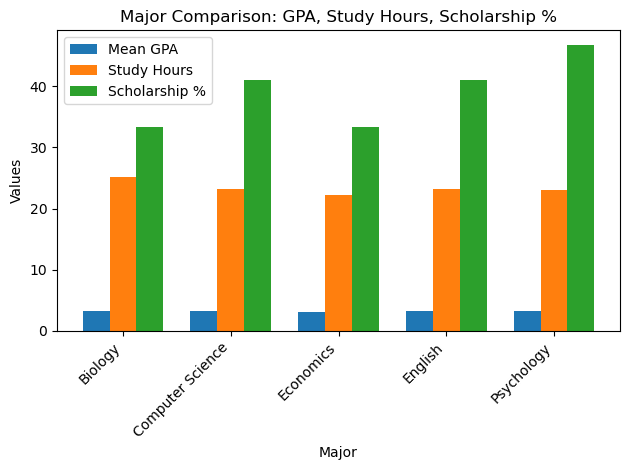

In [137]:
#7. Major comparison. For every major: mean GPA, mean study hours, scholarship %. 
#Print out and Visualize with a grouped bar chart.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

majors = major_summary.index 
gpa = major_summary['Mean GPA']
study = major_summary['Mean Study Hours']
scholarship = major_summary['Scholarship %']

x = np.arange(gpa.shape[0]) 

#make the graph side by side ish
width = 0.25

#specific bar for barchat
plt.bar(x - width, gpa, width, label='Mean GPA')
plt.bar(x, study, width, label='Study Hours')
plt.bar(x + width, scholarship, width, label='Scholarship %')

plt.xticks(x, majors, rotation=45, ha='right')
plt.xlabel('Major')
plt.ylabel('Values')
plt.title('Major Comparison: GPA, Study Hours, Scholarship %')
plt.legend()
plt.tight_layout()
plt.show()




In [148]:
#8. Predictive index. Calculate the (z‑score) GPA (looking back at our class notes), 
#attendance, study hours; Call this variable SuccessScore; list top 15.

import pandas as pd

z_gpa = (academic_df['GPA_Sem2'] - academic_df['GPA_Sem2'].mean()) / academic_df['GPA_Sem2'].std()
z_attendance = (academic_df['AttendanceRate'] - academic_df['AttendanceRate'].mean()) / academic_df['AttendanceRate'].std()
z_study = (academic_df['Hours_Study'] - academic_df['Hours_Study'].mean()) / academic_df['Hours_Study'].std()

academic_df['SuccessScore'] = z_gpa + z_attendance + z_study

top15 = academic_df.sort_values('SuccessScore', ascending=False).head(15)

print("Top 15 Students by SuccessScore:")
print(top15[['SuccessScore', 'GPA_Sem2', 'AttendanceRate', 'Hours_Study']])


Top 15 Students by SuccessScore:
     SuccessScore  GPA_Sem2  AttendanceRate  Hours_Study
12       4.377167      4.00            0.95         39.0
33       3.752649      3.91            0.99         29.0
126      3.652822      3.46            0.99         39.0
94       3.402827      3.53            0.96         39.0
41       3.397478      3.51            0.97         38.0
143      3.375656      3.46            0.97         39.0
179      3.245676      3.93            0.95         29.0
66       3.202695      3.41            0.98         37.0
10       3.092902      3.83            0.97         27.0
92       3.026362      3.88            0.88         38.0
34       3.015886      3.70            0.91         38.0
181      2.966227      4.00            0.89         33.0
220      2.949192      3.67            0.98         28.0
171      2.859824      3.65            0.97         29.0
47       2.717953      3.70            1.00         22.0


---
## Part C — Communication *(15 pts)*

* Explain two actionable insights from your data
* Point to the data that seems to be the most powerful.
* The discussion here should be at least 200 words.
* Your explanation should be in markdown.  Modify the markdown cell below.  
 

## Change me
* Bullet points  **boldface**
* add points
* Make a discussion here. The **boldface**


**The data revealed two actionable insights. First, students who held leadership roles in extracurricular activities had noticeably higher GPAs in Semester 2 than those who did not. This suggests that leadership experience is probably not only a sign of personal initiative but may also contributes to stronger academic performance. By taking on leadership positions, students may can develop critical skills such as time management, accountability, and goal setting. Which are all transferable to academic contexts. This encourages more students to participate in and lead extracurricular. This could be an effective strategy for improving academic outcomes. Second, attendance was consistent and became a reliable predictor of academic success. Students with an attendance rate of 90% or higher significantly outperformed their peers with lower attendance. This shows the importance of coming to school and activly participating in school/class. Schools should monitor attendance closely and intervene early when students begin to miss class. Besides those, among all variables studied, the GPA's z-score has appeared to be the most powerful predictor when creating the column of SuccessScore. Even when combined with the attendance rate and study hours, GPA had the strongest influence. This shows how the value of GPA was a central measure of student performance across values.**
